In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [4]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#need info for: city, Temp, cloudiness, humidity, windspeed, lat, long
# City        -- weather_json['name'] 
# Cloudiness  -- weather_json['clouds']['all']  
# Country     -- weather_json['sys']['country']   
# Date        -- weather_json['dt']
# Humidity    -- weather_json['main']['humidity']
# Lat         -- weather_json['coord']['lat']
# Lng         -- weather_json['coord']['lon']  
# Max Temp    -- weather_json['main']['temp_max']    
# Wind Speed  -- weather_json['wind']['speed']  

In [5]:
#lists to hold weather data
city_name = []
cloudines = []
country =[]
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
not_found = []
loop=1

units='imperial'
base_url= 'http://api.openweathermap.org/data/2.5/weather?'

In [6]:
# Iterate through list of cities previously generated
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name)
print('Beginning Data Retrieval')    
print('-----------------------------')

for x in cities:
#     Query each city within list 
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    weather_response = requests.get(query_url + x)
    weather_json=weather_response.json()
    
#     Use exceptions to account for cities not found in API
    try:
#       Request information from API needed for assignment for each city
        city_name.append(weather_json['name'])
        cloudines.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        print(f'Processing Record {loop} | {x}')
#     KeyError occurs when city not found (no reponse to query into)
    except KeyError:
        not_found.append(x)
        print(f'City ({x}) not found. Skipping...')
        loop=loop-1
    loop+=1
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | castro
Processing Record 2 | nanortalik
Processing Record 3 | vaini
Processing Record 4 | hermanus
Processing Record 5 | san javier
Processing Record 6 | upernavik
City (taolanaro) not found. Skipping...
Processing Record 7 | sherwood
Processing Record 8 | hambantota
Processing Record 9 | morondava
Processing Record 10 | minab
Processing Record 11 | albany
Processing Record 12 | rikitea
Processing Record 13 | awash
Processing Record 14 | carnarvon
Processing Record 15 | namatanai
Processing Record 16 | college
Processing Record 17 | florianopolis
Processing Record 18 | saint anthony
Processing Record 19 | hasaki
Processing Record 20 | qaanaaq
Processing Record 21 | dawlatabad
Processing Record 22 | hobart
Processing Record 23 | new norfolk
Processing Record 24 | khatanga
Processing Record 25 | lompoc
Processing Record 26 | yamada
Processing Record 27 | lata
Processing Record 28 | marienburg
Processing Record 2

Processing Record 226 | el cobre
Processing Record 227 | rock springs
Processing Record 228 | san jose
Processing Record 229 | taoudenni
Processing Record 230 | shenzhen
Processing Record 231 | eirunepe
Processing Record 232 | saint george
Processing Record 233 | aleksandrov gay
Processing Record 234 | boende
Processing Record 235 | chapais
Processing Record 236 | elko
Processing Record 237 | ponta do sol
Processing Record 238 | bolivar
Processing Record 239 | havre-saint-pierre
Processing Record 240 | aklavik
Processing Record 241 | tandalti
City (tsihombe) not found. Skipping...
Processing Record 242 | srednekolymsk
Processing Record 243 | tomball
Processing Record 244 | nesbyen
Processing Record 245 | port elizabeth
Processing Record 246 | alofi
Processing Record 247 | antofagasta
City (halalo) not found. Skipping...
Processing Record 248 | rafsanjan
Processing Record 249 | pokhara
Processing Record 250 | jesup
Processing Record 251 | omboue
Processing Record 252 | severo-kurilsk
Pr

Processing Record 448 | salalah
Processing Record 449 | nova olinda do norte
Processing Record 450 | puerto madryn
Processing Record 451 | batemans bay
Processing Record 452 | beringovskiy
Processing Record 453 | kulhudhuffushi
Processing Record 454 | inverness
Processing Record 455 | santa marta
Processing Record 456 | nabire
Processing Record 457 | husavik
City (ituni) not found. Skipping...
City (moiyabana) not found. Skipping...
Processing Record 458 | havoysund
Processing Record 459 | tual
Processing Record 460 | puerto leguizamo
City (paradwip) not found. Skipping...
Processing Record 461 | sao lourenco do sul
Processing Record 462 | miguel hidalgo
Processing Record 463 | lakatoro
Processing Record 464 | pisco
Processing Record 465 | belmonte
Processing Record 466 | ugoofaaru
Processing Record 467 | storslett
Processing Record 468 | noshiro
Processing Record 469 | sarangani
Processing Record 470 | sept-iles
Processing Record 471 | bentiu
Processing Record 472 | aripuana
Processin

In [7]:
# Some cities not found
print(f'{len(not_found)}/{len(cities)} cities were not found')

# Create new list excluding the missing information
not_found=set(not_found)
cities=set(cities)
updated_cities = list(cities-not_found)

#should it be run again?

56/643 cities were not found


In [11]:
dates=[]
for city in date:
    date_test=city
    date_conversion=time.gmtime(date_test)
    date_format=time.strftime('%m/%d/%Y',date_conversion )
    dates.append(date_format)

In [12]:
# Create data frame with lists for each city
weather_df=pd.DataFrame({"City": city_name,
                        'Cloudiness': cloudines,
                        'Country': country,
                        'Date': date,
                        'Humidity (%)': humidity,
                        'Latitude': lat,
                        'Longitude': lon,
                        'Max Temperature': max_temp,
                        'Wind Speed (MPH)': wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temperature,Wind Speed (MPH)
0,Castro,0,BR,1583895273,92,-24.79,-50.01,61.16,5.50
1,Nanortalik,83,GL,1583895295,80,60.14,-45.24,20.61,8.08
2,Vaini,75,TO,1583895310,94,-21.20,-175.20,78.80,3.36
3,Hermanus,100,ZA,1583895310,83,-34.42,19.23,67.19,25.57
4,San Javier,0,ES,1583895311,76,37.81,-0.84,57.99,5.82


In [30]:
# Export the city data into a .csv.
weather_df.to_csv('output_data/cities.csv', encoding='utf-8',index=False)

In [ ]:
# PLOTTING

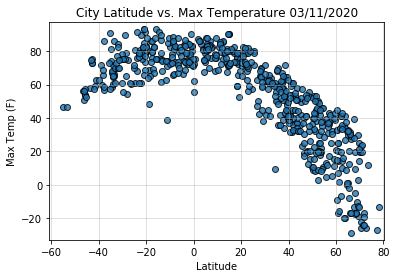

In [31]:
# Latitude vs. Temperature Plot
x_latitude = weather_df.loc[:,'Latitude']
y_temp = weather_df.loc[:,'Max Temperature']
plt.scatter(x_latitude,y_temp, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_temp)-4,max(y_temp)+4)

plt.savefig("output_data/lat_temp.png")

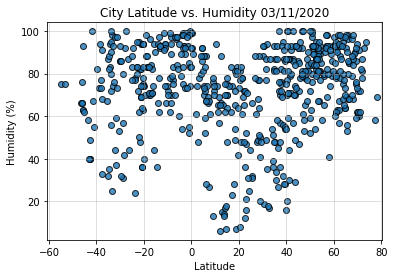

In [32]:
# Latitude vs. Humidity Plot
y_humidity = weather_df.loc[:,'Humidity (%)']
plt.scatter(x_latitude,y_humidity, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_humidity)-4,max(y_humidity)+4)

plt.savefig("output_data/lat_humidity.png")

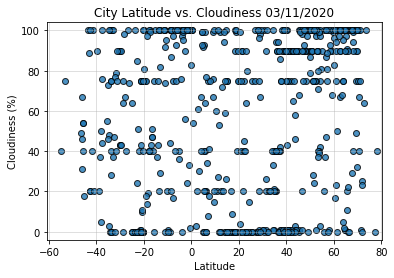

In [33]:
# Latitude vs. Cloudiness Plot
y_cloudiness = weather_df.loc[:,'Cloudiness']
plt.scatter(x_latitude,y_cloudiness, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_cloudiness)-4,max(y_cloudiness)+4)

plt.savefig("output_data/lat_cloud.png")

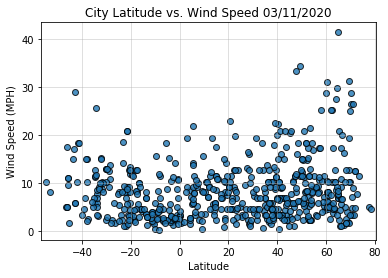

In [34]:
# Latitude vs. Wind Speed Plot
y_wind = weather_df.loc[:,'Wind Speed (MPH)']
plt.scatter(x_latitude,y_wind, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-2,max(x_latitude)+2)
plt.ylim(min(y_wind)-2,max(y_wind)+2)

plt.savefig("output_data/lat_wind.png")

In [20]:
# Create Northern and Southern Hemisphere DataFrames 
# Northern: Lat 0 - 90
# Southern: Lat 0 - (-90)
northern_df= weather_df.loc[weather_df['Latitude']>=0]
southern_df= weather_df.loc[weather_df['Latitude']<0]



In [21]:
#Create function to plot each graph with line of best fit:
def plot_graph(x,y):
    plt.scatter(x,y)
    plt.xlim(min(x)-3,max(x)+2)
    plt.ylim(min(y)-4,max(y)+4)
    #Correlation
    _slope, _int, _r, _p, _std_err = st.linregress(x, y)
    best_fit = _slope * x + _int
    plt.plot(x,best_fit,"r-", linewidth=.5)
    line_eq = "y = " + str(round(_slope,2)) + "x + " + str(round(_int,2))
    plt.annotate(line_eq,(min(x)+10,min(y)+20),fontsize=12,color="red")
    #pearon correlation statement
    pearson_r=st.pearsonr(x,y)[0]
    if abs(pearson_r)>0.7:
        print(f'The r value is {round(pearson_r,2)}, there is strong correlation between the city latitude and weather')
    elif abs(pearson_r)>0.5:
        print(f'The r value is {round(pearson_r,2)}, there is a moderate correlation between the city latitude and weather')
    elif abs(pearson_r)>0.3:
        print(f'The r value is {round(pearson_r,2)}, there is a weak correlation between the city latitude and weather')
    else:
        print(f'The r value is {round(pearson_r,2)}, there is no correlation between the city latitude and weather')
        

The r value is -0.87, there is strong correlation between the city latitude and weather


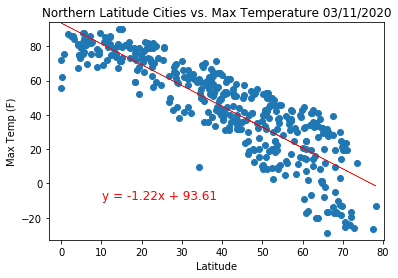

In [35]:
# NORTHERN Latitude vs. Temperature Plot
#These will be the x,y axis for plots needed
n_latitude = northern_df.loc[:,'Latitude']
n_temp = northern_df.loc[:,'Max Temperature']

plot_graph(n_latitude,n_temp)

#format
plt.title(f"Northern Latitude Cities vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/north_temp.png")

The r value is 0.49, there is a weak correlation between the city latitude and weather


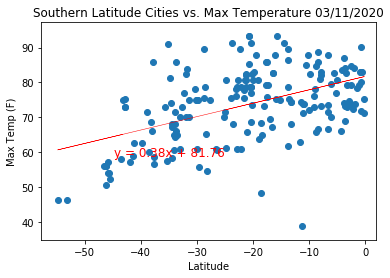

In [37]:
# SOUTHERN Latitude vs. Temperature Plot
#These will be the x,y axis for plots needed

s_latitude = southern_df.loc[:,'Latitude']
s_temp = southern_df.loc[:,'Max Temperature']

plot_graph(s_latitude,s_temp)

plt.title(f"Southern Latitude Cities vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/south_temp.png")

The r value is 0.34, there is a weak correlation between the city latitude and weather


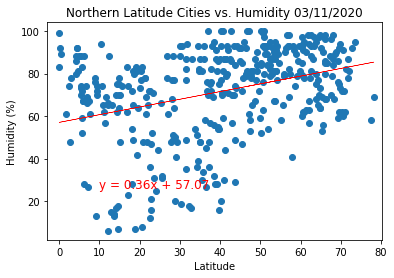

In [38]:
# NORTHERN Latitude vs. Humidity Plot
#These will be the x,y axis for plots needed
n_latitude = northern_df.loc[:,'Latitude']
n_humidity = northern_df.loc[:,'Humidity (%)']

plot_graph(n_latitude,n_humidity)

plt.title(f"Northern Latitude Cities vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/north_humidity.png")

The r value is 0.31, there is a weak correlation between the city latitude and weather


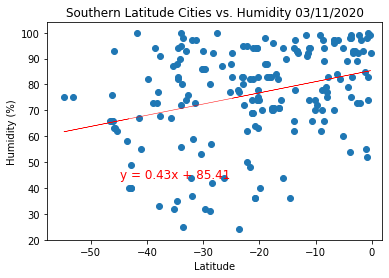

In [39]:
# SOUTHERN Latitude vs. Humidity Plot
#These will be the x,y axis for plots needed
s_latitude = southern_df.loc[:,'Latitude']
s_humidity = southern_df.loc[:,'Humidity (%)']

plot_graph(s_latitude,s_humidity)

plt.title(f"Southern Latitude Cities vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/south_humidity.png")

The r value is 0.28, there is no correlation between the city latitude and weather


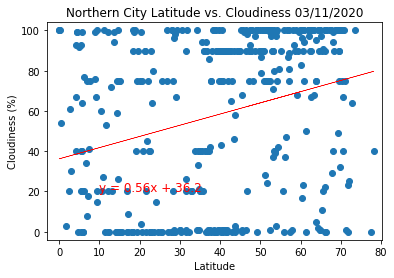

In [40]:
# NORTHERN Latitude vs. Cloudiness Plot
#These will be the x,y axis for plots needed
n_latitude = northern_df.loc[:,'Latitude']
n_cloudiness = northern_df.loc[:,'Cloudiness']

plot_graph(n_latitude,n_cloudiness)

plt.title(f"Northern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/north_cloud.png")

The r value is 0.23, there is no correlation between the city latitude and weather


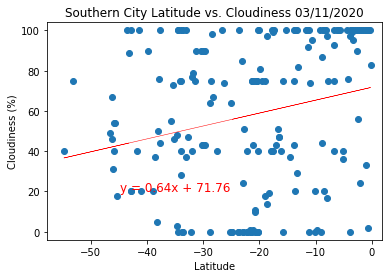

In [41]:
# SOUTHERN Latitude vs. Cloudiness Plot
#These will be the x,y axis for plots needed
s_latitude = southern_df.loc[:,'Latitude']
s_cloudiness = southern_df.loc[:,'Cloudiness']

plot_graph(s_latitude,s_cloudiness)

plt.title(f"Southern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/south_cloud.png")

The r value is 0.17, there is no correlation between the city latitude and weather


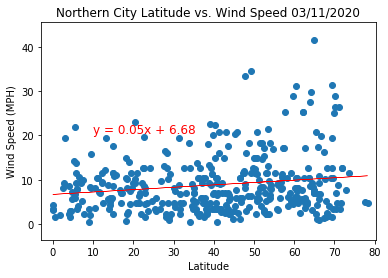

In [43]:
# NORTHERN Latitude vs. Wind Speed Plot
#These will be the x,y axis for plots needed
n_latitude = northern_df.loc[:,'Latitude']

n_wind = northern_df.loc[:,'Wind Speed (MPH)']

plot_graph(n_latitude,n_wind)
plt.title(f"Northern City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (MPH)")

plt.savefig("output_data/north_wind.png")

The r value is -0.35, there is a weak correlation between the city latitude and weather


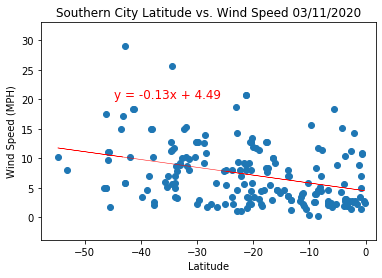

In [45]:
# SOUTHER Latitude vs. Wind Speed Plot
#These will be the x,y axis for plots needed
s_latitude = southern_df.loc[:,'Latitude']
s_wind = southern_df.loc[:,'Wind Speed (MPH)']

plot_graph(s_latitude,s_wind)

plt.title(f"Southern City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (MPH)")

plt.savefig("output_data/south_wind.png")